In [20]:
import pandas as pd
import numpy as np
from itertools import product
import random
import matplotlib.pyplot as plt
import Hyperopt as hp

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

ModuleNotFoundError: No module named 'Hyperopt'

In [ ]:
x_lims = [0.01, 3.0]
y_lims = [5, 24]
def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

In [ ]:
data = pd.read_csv('data/credit-card-full.csv', index_col='ID')
X = data.drop(axis=1, columns='default payment next month')
y = data['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75)

In [ ]:
# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

In [ ]:
# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ['auto', 'sqrt', 'log2']

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

In [ ]:
# Create the parameter grid
param_grid = {
    'learning_rate': np.linspace(.1,2,150), 
    'min_samples_leaf': list(range(20,65))
} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

In [ ]:
# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True )

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

In [ ]:
combinations_list[0:300]

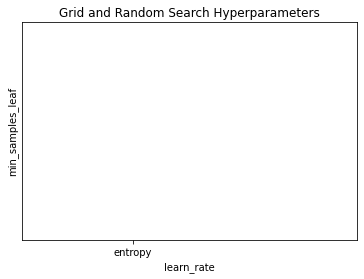

In [18]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)